In [1]:
#!/usr/bin/python

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

%matplotlib notebook

update_rate:  21.620302958099302


<IPython.core.display.Javascript object>


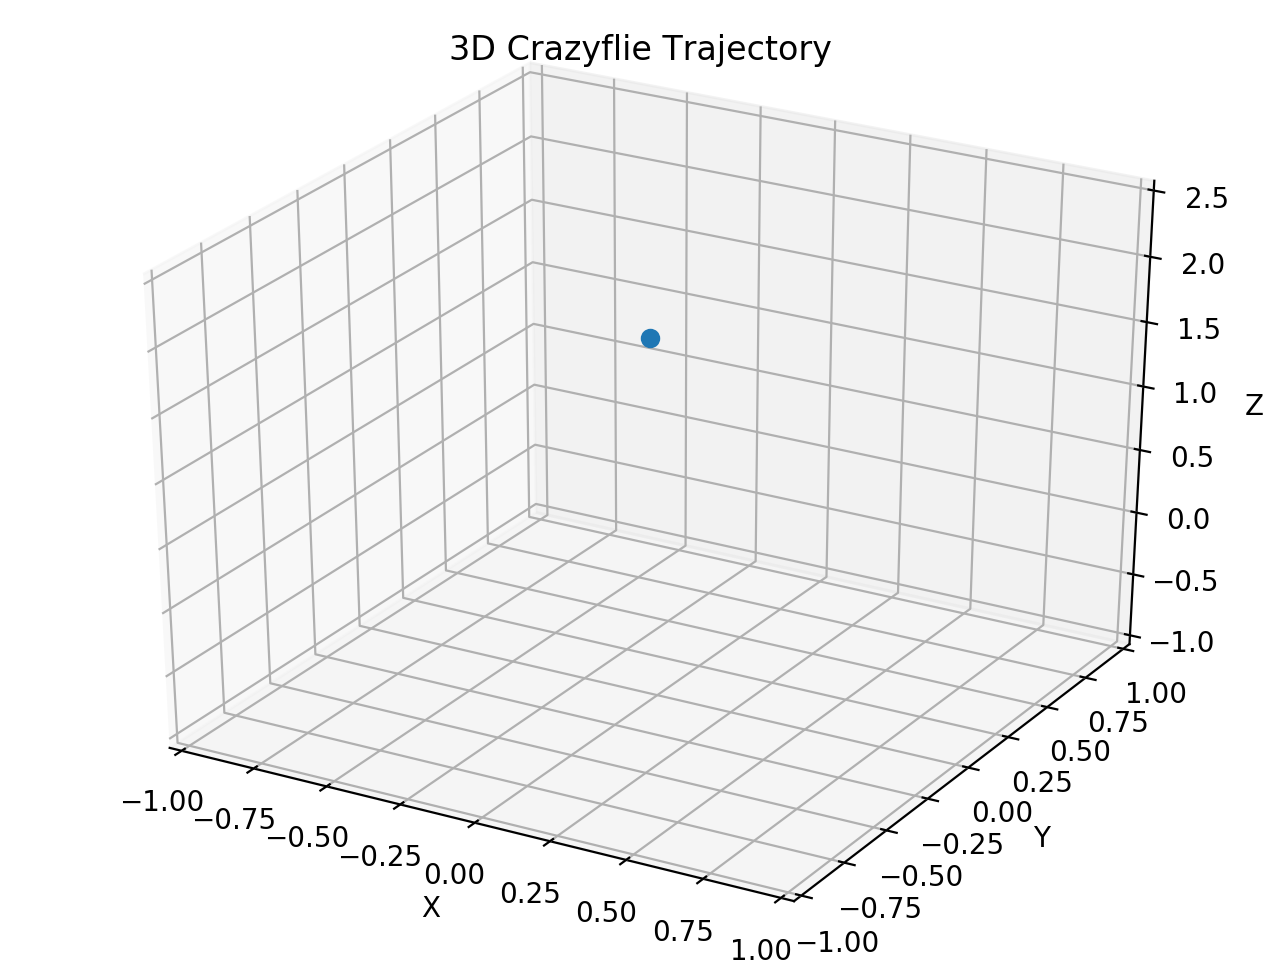

In [3]:


# MODIFY CODE HERE ##############################################################################################

number_of_frames = 300

# Data creation

v = 0.7
v_θ = 0.685
v_z = (v**2 - v_θ**2)**0.5

t = 2/v_z
l = t*v_θ/0.5 #angular distance
dt = t / number_of_frames
z = np.linspace(0.5,2,number_of_frames)
rest_t = t - 0.5/v_θ/2*0.5
x = 0.5*np.sin(z*l/2)
y = 0.5*np.cos(z*l/2) 
#x, y, z = theta = np.zeros(number_of_frames), np.linspace(-1, 1, number_of_frames), np.full((number_of_frames), 0.5)
theta = x,y,z
# Parameters of flight
# crazyflie_vel = 0.7
delay_between_frames = dt*1000 # in milliseconds, have to be calculated to satisfy crazyflie_vel

# DO NOT MODIFY CODE BELOW ##########################################################################################



# update_rate have to be around 60, adjust number_of_frames
update_rate = 1/(delay_between_frames/1000)
print("update_rate: ", update_rate)





# VISUALIZATION
def update_lines(num, dataLines, lines) :
    for line, data in zip(lines, dataLines) :
        line.set_data(data[0:2, num-1:num])
        line.set_3d_properties(data[2,num-1:num])
    return lines
# Data manipulation
data = [np.vstack((x, y, z))]
# Attach 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)
lines = [ax.plot(data[0][0,0:1], data[0][1,0:1], data[0][2,0:1], 'o')[0]]
# Setthe axes properties
ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')
ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')
ax.set_zlim3d([-1.0, 2.5])
ax.set_zlabel('Z')
ax.set_title('3D Crazyflie Trajectory')
# Creating the Animation object
ani = animation.FuncAnimation(fig, update_lines, number_of_frames, fargs=(data, lines),
                              interval=delay_between_frames, blit=False)
plt.show()
